<a href="https://colab.research.google.com/github/mjiii25/prac_class/blob/main/pp_notnotyet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
import string
from matplotlib import font_manager,rc
import datetime

plt.rc('font', family = 'MALGUNSL')
plt.rc('axes', unicode_minus = False)


## **서울 구별 클러스터링**

: 구별 위도와 경도 데이터를 사용하여 서울 지역구를 몇 개의 클러스터링으로 구분

In [2]:
Region = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS4oYFREoUEjz1dUJ8thI66FccIwV7Ma8LwDXQgW3i8KFJ2QBW8_7y3_k5Vl1b_FCTyn4rw1PFt8NG0/pub?output=csv')
Region

df = Region[['gu', 'gu_eng', 'latitude', 'longitude']]
df = df.drop(index = 0)
df.head(10)

,gu,gu_eng,latitude,longitude
1,중구,Jung,37.563750,126.997498
2,용산구,Yongsan,37.532436,126.990257
3,성동구,Seongdong,37.563453,127.036938
4,광진구,Kwangjin,37.538537,127.082369
5,동대문구,Dongdaemun,37.574420,127.039732
6,중랑구,Jungnang,37.606560,127.092622
7,성북구,Seongbuk,37.589375,127.016740
8,강북구,Gangbuk,37.639773,127.025514
9,도봉구,Dobong,37.668773,127.047072
10,노원구,Nowon,37.654108,127.056321


findfont: Font family ['MALGUNSL'] not found. Falling back to DejaVu Sans.


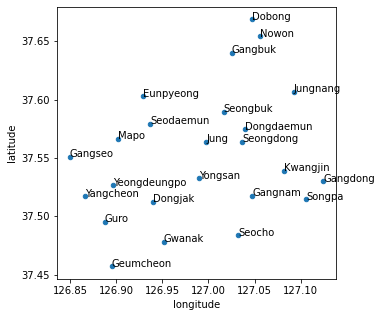

In [3]:
fig, ax = plt.subplots(figsize = (5,5))
df.drop(columns = 'gu_eng').plot.scatter(x='longitude', y='latitude', ax=ax)
for ind in df.index:
  ax.annotate(df.loc[ind]['gu_eng'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 2020).fit(df[['longitude', 'latitude']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [5]:
df['clustering'] = labels
df.head(10)

,gu,gu_eng,latitude,longitude,clustering
1,중구,Jung,37.563750,126.997498,2
2,용산구,Yongsan,37.532436,126.990257,2
3,성동구,Seongdong,37.563453,127.036938,2
4,광진구,Kwangjin,37.538537,127.082369,0
5,동대문구,Dongdaemun,37.574420,127.039732,2
6,중랑구,Jungnang,37.606560,127.092622,3
7,성북구,Seongbuk,37.589375,127.016740,2
8,강북구,Gangbuk,37.639773,127.025514,3
9,도봉구,Dobong,37.668773,127.047072,3
10,노원구,Nowon,37.654108,127.056321,3


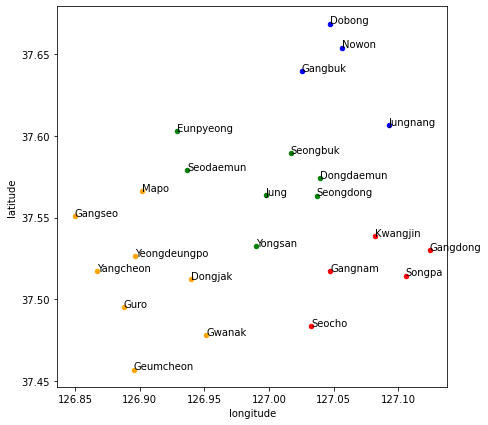

In [6]:
fig, ax = plt.subplots(figsize = (7,7))

df_temp = df[df['clustering'] == 0]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Red')

df_temp = df[df['clustering'] == 1]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Orange')

df_temp = df[df['clustering'] == 2]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Green')

df_temp = df[df['clustering'] == 3]
df_temp.plot.scatter(x = 'longitude', y = 'latitude', ax=ax, color = 'Blue')

for ind in df.index:
  ax.annotate(df.loc[ind]['gu_eng'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

In [7]:
df.loc[:, 'clustering'] = df.clustering.replace([0,1,2,3], ['강남구외', '강서구외', '강북구외', '종로구외'])
df.head(10)

,gu,gu_eng,latitude,longitude,clustering
1,중구,Jung,37.563750,126.997498,강북구외
2,용산구,Yongsan,37.532436,126.990257,강북구외
3,성동구,Seongdong,37.563453,127.036938,강북구외
4,광진구,Kwangjin,37.538537,127.082369,강남구외
5,동대문구,Dongdaemun,37.574420,127.039732,강북구외
6,중랑구,Jungnang,37.606560,127.092622,종로구외
7,성북구,Seongbuk,37.589375,127.016740,강북구외
8,강북구,Gangbuk,37.639773,127.025514,종로구외
9,도봉구,Dobong,37.668773,127.047072,종로구외
10,노원구,Nowon,37.654108,127.056321,종로구외


In [8]:
Region = df

In [28]:
Usage = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdKoiVOqJaekMosp6XRpp-brbtLiilhLKqEz85XCRPF9GT9IegjrWASMIFNmyMYQLnjzMXIfyHlkUr/pub?output=csv')
Usage

,province,gu,gu_eng,date,count
0,서울,종로구,Jongno,2020-07,85935
1,서울,중구,Jung,2020-07,52417
2,서울,용산구,Yongsan,2020-07,58354
3,서울,성동구,Seongdong,2020-07,106216
4,서울,광진구,Kwangjin,2020-07,125735
...,...,...,...,...,...
170,서울,관악구,Gwanak,2021-01,27457
171,서울,서초구,Seocho,2021-01,29483
172,서울,강남구,Gangnam,2021-01,24706
173,서울,송파구,Songpa,2021-01,54819


In [29]:
Usage['clustering'] = Usage.gu.replace(Region.gu.values, Region.clustering.values)
Usage

,province,gu,gu_eng,date,count,clustering
0,서울,종로구,Jongno,2020-07,85935,종로구
1,서울,중구,Jung,2020-07,52417,강북구외
2,서울,용산구,Yongsan,2020-07,58354,강북구외
3,서울,성동구,Seongdong,2020-07,106216,강북구외
4,서울,광진구,Kwangjin,2020-07,125735,강남구외
...,...,...,...,...,...,...
170,서울,관악구,Gwanak,2021-01,27457,강서구외
171,서울,서초구,Seocho,2021-01,29483,강남구외
172,서울,강남구,Gangnam,2021-01,24706,강남구외
173,서울,송파구,Songpa,2021-01,54819,강남구외


In [11]:
Usage_Gangnams = Usage[Usage.clustering == '강남구외']
grouped_Gangnams = Usage_Gangnams.groupby(['gu']).sum()

axis[1,1].set_title('강남구외', fontsize = 20)
axis[1,1].set_xlabel('날짜', fontsize = 15)
axis[1,1].set_ylabel('따릉이 사용 건수', fontsize = 15)



Usage_Gangseos = Usage[Usage.clustering == '강서구외']
grouped_Gangseos = Usage_Gangnams.groupby(['gu']).sum()

axes[1,0].set_title('강서구외', fontsize = 20)
axis[1,0].set_xlabel('날짜', fontsize = 15)
axis[1,0].set_ylabel('따릉이 사용 건수', fontsize = 15)



Usage_Gangbuks = Usage[Usage.clustering == '강북구외']
grouped_Gangbuks = Usage_Gangnams.groupby(['gu']).sum()

axes[0,1].set_title('강북구외', fontsize = 20)
axis[0,1].set_xlabel('날짜', fontsize = 15)
axis[0,1].set_ylabel('따릉이 사용 건수', fontsize = 15)



Usage_Jongnos = Usage[Usage.clustering == '종로구외']
grouped_Jongnos = Usage_Gangnams.groupby(['gu']).sum()

axes[0,0].set_title('종로구외', fontsize = 20)
axis[0,0].set_xlabel('날짜', fontsize = 15)
axis[0,0].set_ylabel('따릉이 사용 건수', fontsize = 15)


NameError: ignored

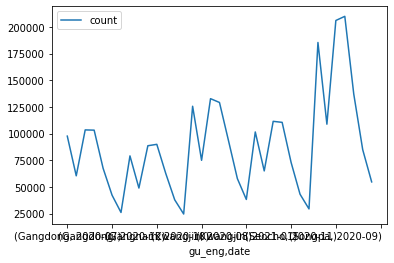

In [31]:
#fig,axs=plt.subplots(2,2,figsize=(20,20))

Usage_Gangnams = Usage[Usage.clustering == '강남구외']
grouped_Gangnams = Usage_Gangnams.drop(columns=['province', 'gu']).groupby(['gu_eng', 'date']).sum()
grouped_Gangnams.plot()



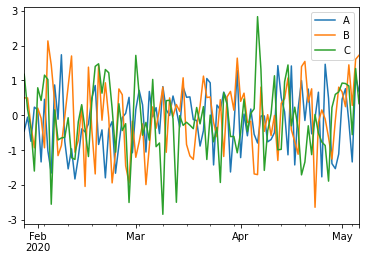

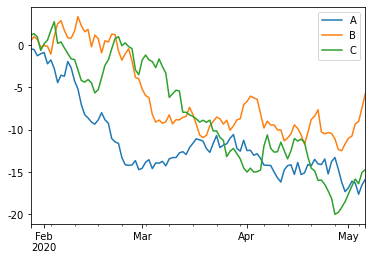

In [22]:
df = pd.DataFrame(np.random.randn(100,3),
            index=pd.date_range('1/28/2020',periods=100),
            columns=['A','B','C'])

df.plot() # 일변 변화량 또는 변동폭을 그래프로 나타냄
df.cumsum().plot()